In [1]:
!python /home/guest/FYP/src/train_CVAE.py

cVAE(
  (encoder): Encoder(
    (encode): Sequential(
      (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
      (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (14): Flatten()
      (15): MLP(
    

100%|███████████| 764/764 [02:49<00:00,  4.51it/s]
epoch 113, train loss 4.583254E+04, time 169.5 sec
EarlyStopping counter: 8 out of 20
100%|███████████| 764/764 [02:50<00:00,  4.49it/s]
epoch 114, train loss 4.583035E+04, time 170.3 sec
EarlyStopping counter: 9 out of 20
100%|███████████| 764/764 [02:49<00:00,  4.51it/s]
epoch 115, train loss 4.582508E+04, time 169.5 sec
EarlyStopping counter: 10 out of 20
100%|███████████| 764/764 [02:50<00:00,  4.49it/s]
epoch 116, train loss 4.582783E+04, time 170.3 sec
EarlyStopping counter: 11 out of 20
100%|███████████| 764/764 [02:51<00:00,  4.46it/s]
epoch 117, train loss 4.583015E+04, time 171.3 sec
EarlyStopping counter: 12 out of 20
100%|███████████| 764/764 [02:50<00:00,  4.49it/s]
epoch 118, train loss 4.583208E+04, time 170.3 sec
EarlyStopping counter: 13 out of 20
100%|███████████| 764/764 [02:50<00:00,  4.48it/s]
epoch 119, train loss 4.583340E+04, time 170.6 sec
EarlyStopping counter: 14 out of 20
100%|███████████| 764/764 [02:50<00:

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import torch
from src.CVAE import cVAE
from matplotlib import pyplot as plt
from matplotlib import cm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

net = cVAE((3, 192, 256), nclass = 21, nhid = 16, ncond = 32)
checkpoint = torch.load("cVAE.pt", map_location = device)
net.load_state_dict(checkpoint["net"])
net.to(device)
net.eval()

cVAE(
  (encoder): Encoder(
    (encode): Sequential(
      (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
      (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (14): Flatten()
      (15): MLP(
    

RuntimeError: Failed to run torchsummary. See above stack traces for more details. Executed layers up to: []

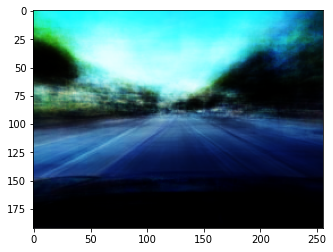

In [57]:
from PIL import Image
with torch.no_grad():
    x = net.generate(20)
plt.imshow(x.squeeze(0).cpu().numpy().transpose(1, 2, 0))
# plt.axis('off')
# plt.tight_layout()
# plt.savefig('right_right3_3.jpg', bbox_inches='tight', pad_inches=0)

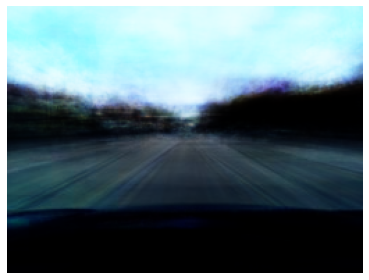

In [22]:
label = 20
rootname = "rr3.jpg"
for i in range(60):
    with torch.no_grad():
        x = net.generate(label)
    plt.imshow(x.squeeze(0).cpu().numpy().transpose(1, 2, 0))
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("/home/guest/FYP/notebook/GeneratedImage/right_right3/" + str(i+1) + "_" + rootname, bbox_inches='tight', pad_inches=0)

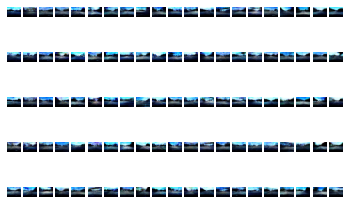

In [45]:
with torch.no_grad():
    x = net.generate(torch.tensor([list(range(21))] * 5).clone().view(-1))

    
for i in range(105):
    plt.subplot(5, 21, i+1)
    plt.axis("off")
    plt.imshow(x[i].squeeze(0).cpu().numpy().transpose(1,2,0))

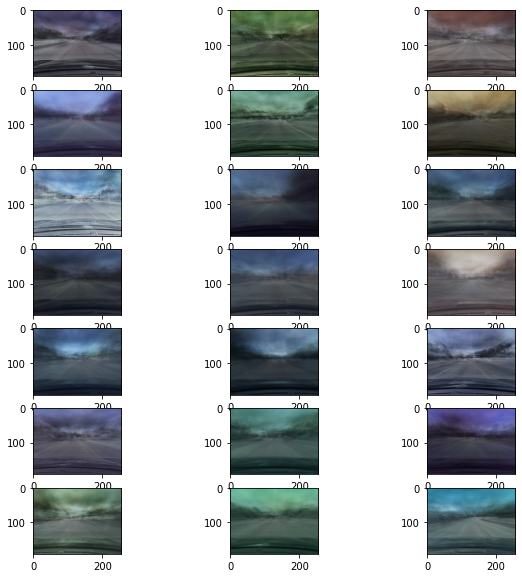

In [150]:
fig = plt.figure(figsize=((10,10)))
plt1 = fig.add_subplot(731)
plt2 = fig.add_subplot(732)
plt3 = fig.add_subplot(733)
plt4 = fig.add_subplot(734)
plt5 = fig.add_subplot(735)
plt6 = fig.add_subplot(736)
plt7 = fig.add_subplot(737)
plt8 = fig.add_subplot(738)
plt9 = fig.add_subplot(739)
plt10 = fig.add_subplot(7,3,10)
plt11 = fig.add_subplot(7,3,11)
plt12 = fig.add_subplot(7,3,12)
plt13 = fig.add_subplot(7,3,13)
plt14 = fig.add_subplot(7,3,14)
plt15 = fig.add_subplot(7,3,15)
plt16 = fig.add_subplot(7,3,16)
plt17 = fig.add_subplot(7,3,17)
plt18 = fig.add_subplot(7,3,18)
plt19 = fig.add_subplot(7,3,19)
plt20 = fig.add_subplot(7,3,20)
plt21 = fig.add_subplot(7,3,21)
a = 21
plt1.imshow(x[a].squeeze(0).cpu().numpy().transpose(1,2,0))
plt2.imshow(x[a+1].squeeze(0).cpu().numpy().transpose(1,2,0))
plt3.imshow(x[a+2].squeeze(0).cpu().numpy().transpose(1,2,0))
plt4.imshow(x[a+3].squeeze(0).cpu().numpy().transpose(1,2,0))
plt5.imshow(x[a+4].squeeze(0).cpu().numpy().transpose(1,2,0))
plt6.imshow(x[a+5].squeeze(0).cpu().numpy().transpose(1,2,0))
plt7.imshow(x[a+6].squeeze(0).cpu().numpy().transpose(1,2,0))
plt8.imshow(x[a+7].squeeze(0).cpu().numpy().transpose(1,2,0))
plt9.imshow(x[a+8].squeeze(0).cpu().numpy().transpose(1,2,0))
plt10.imshow(x[a+9].squeeze(0).cpu().numpy().transpose(1,2,0))
plt11.imshow(x[a+10].squeeze(0).cpu().numpy().transpose(1,2,0))
plt12.imshow(x[a+11].squeeze(0).cpu().numpy().transpose(1,2,0))
plt13.imshow(x[a+12].squeeze(0).cpu().numpy().transpose(1,2,0))
plt14.imshow(x[a+13].squeeze(0).cpu().numpy().transpose(1,2,0))
plt15.imshow(x[a+14].squeeze(0).cpu().numpy().transpose(1,2,0))
plt16.imshow(x[a+15].squeeze(0).cpu().numpy().transpose(1,2,0))
plt17.imshow(x[a+16].squeeze(0).cpu().numpy().transpose(1,2,0))
plt18.imshow(x[a+17].squeeze(0).cpu().numpy().transpose(1,2,0))
plt19.imshow(x[a+18].squeeze(0).cpu().numpy().transpose(1,2,0))
plt20.imshow(x[a+19].squeeze(0).cpu().numpy().transpose(1,2,0))
plt21.imshow(x[a+20].squeeze(0).cpu().numpy().transpose(1,2,0))